<a href="https://colab.research.google.com/github/shinde0001/a-simple-chatbot-streamlit/blob/main/Liner%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
uploaded = files.upload()
df = pd.read_csv('Pune_House_Data.csv')
df.head()

Saving Pune_House_Data.csv to Pune_House_Data.csv


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [4]:
df.tail()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.0,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.0,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.0,Prabhat Road
13319,Super built-up Area,Ready To Move,1 BHK,NaN,550,1.0,1.0,17.0,Pune Railway Station


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,0
area_type,0
availability,0
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
site_location,1


In [7]:
df.dtypes

,0
area_type,object
availability,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64
site_location,object


In [8]:
df = df.drop_duplicates()


In [9]:
# Check for unique values in each column
for col in df.columns:
  print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in area_type: 4
Unique values in availability: 81
Unique values in size: 31
Unique values in society: 2688
Unique values in total_sqft: 2117
Unique values in bath: 19
Unique values in balcony: 4
Unique values in price: 1994
Unique values in site_location: 97


In [10]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8781
Built-up Area,2417
Plot Area,2024
Carpet Area,87


In [11]:
df['availability'].value_counts()

,count
availability,
Ready To Move,10574
18-Dec,305
18-May,295
18-Apr,271
18-Aug,199
...,...
15-Aug,1
17-Jan,1
16-Nov,1


In [12]:
df['size'].value_counts()

,count
size,
2 BHK,5194
3 BHK,4307
4 Bedroom,826
4 BHK,589
3 Bedroom,547
1 BHK,538
2 Bedroom,328
5 Bedroom,297
6 Bedroom,191


In [13]:
df['society'].value_counts()

,count
society,
GrrvaGr,80
PrarePa,76
Sryalan,59
Prtates,59
GMown E,56
...,...
Amionce,1
JaghtDe,1
Jauraht,1


In [14]:
df['site_location'].value_counts()

,count
site_location,
Alandi Road,139
Kondhwa Khurd,139
Mangalwar peth,139
Mahatma Gandhi Road,139
Lulla Nagar,139
...,...
Dehu Road,138
Ghorpadi,138
Wanowrie,137


In [15]:
# Alternative approach (not implemented here due to ambiguity in the prompt):
# If you want to calculate days until availability, you need a reference date  and a more sophisticated parsing of the 'availability' column.
# For example:
from datetime import datetime, timedelta
from datetime import datetime

# Alternative approach (modified to set the year to 2025):
current_date = datetime(2025, 1, 1)  # Set the reference year to 2025

def days_to_availability(availability_str):
    try:
        availability_date = datetime.strptime(availability_str, '%d-%b')
        # Set the year of availability_date to 2025
        availability_date = availability_date.replace(year=current_date.year)
        days_diff = (availability_date - current_date).days
        return max(0, days_diff)
    except ValueError:
        return 0

df['availability_days'] = df['availability'].apply(days_to_availability)

In [16]:
# Convert availability to 'Ready To Move' and 'Not Ready'
df['availability'] = df['availability'].apply(lambda x: 'Ready To Move' if x == 'Ready To Move' else 'Not Ready')


In [17]:
# size
df.groupby('size')['size'].agg('count')

,size
size,
1 BHK,538
1 Bedroom,105
1 RK,13
10 BHK,2
10 Bedroom,12
11 BHK,2
11 Bedroom,2
12 Bedroom,1
13 BHK,1


In [18]:

# Target Guided Ordinal Encoding for area_type
df['area_type'] = df['area_type'].astype(str)
area_type_order = df.groupby('area_type')['price'].mean().sort_values().index
area_type_mapping = {k: i for i, k in enumerate(area_type_order, 0)}
df['area_type'] = df['area_type'].map(area_type_mapping)

In [19]:
area_type_mapping

{'Carpet  Area': 0,
 'Super built-up  Area': 1,
 'Built-up  Area': 2,
 'Plot  Area': 3}

In [20]:
# Label Encoding
# Convert 'availability' to 'Ready To Move'as 1 and 'Not Ready' as 0
df['availability'] = df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13309 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area_type          13309 non-null  int64  
 1   availability       13309 non-null  int64  
 2   size               13293 non-null  object 
 3   society            7814 non-null   object 
 4   total_sqft         13309 non-null  object 
 5   bath               13236 non-null  float64
 6   balcony            12700 non-null  float64
 7   price              13309 non-null  float64
 8   site_location      13308 non-null  object 
 9   availability_days  13309 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


In [22]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location', 'availability_days'],
      dtype='object')

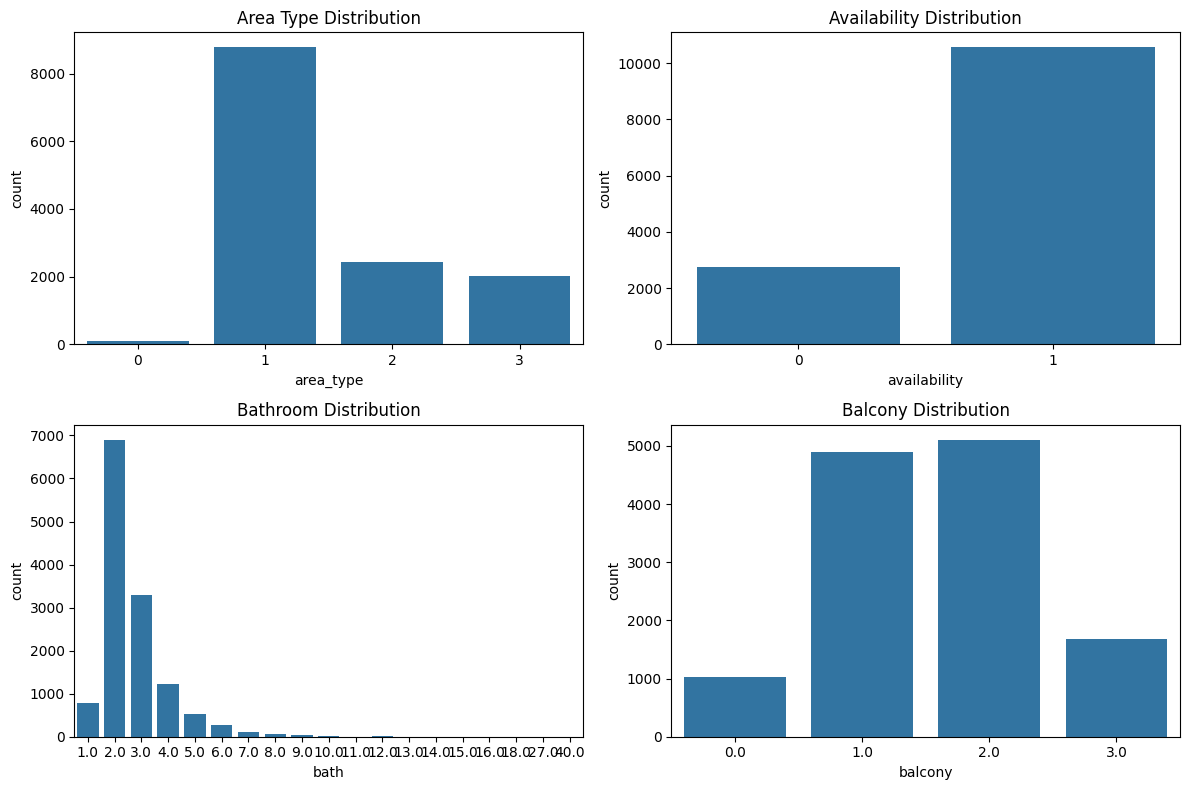

In [23]:
# Create the bar plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='area_type', data=df)
plt.title('Area Type Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='availability', data=df)
plt.title('Availability Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='bath', data=df)
plt.title('Bathroom Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='balcony', data=df)
plt.title('Balcony Distribution')

plt.tight_layout()
plt.show()

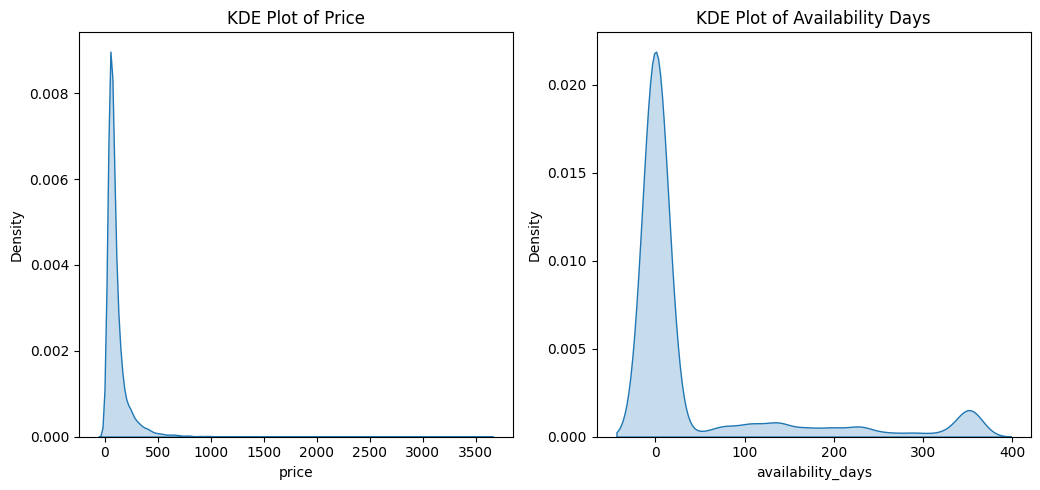

In [24]:
# kde plot for number_of_bedrooms, price, availability_days.

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.kdeplot(df['price'], fill=True)
plt.title('KDE Plot of Price')

plt.subplot(1, 3, 3)
sns.kdeplot(df['availability_days'], fill=True)
plt.title('KDE Plot of Availability Days')

plt.tight_layout()
plt.show()

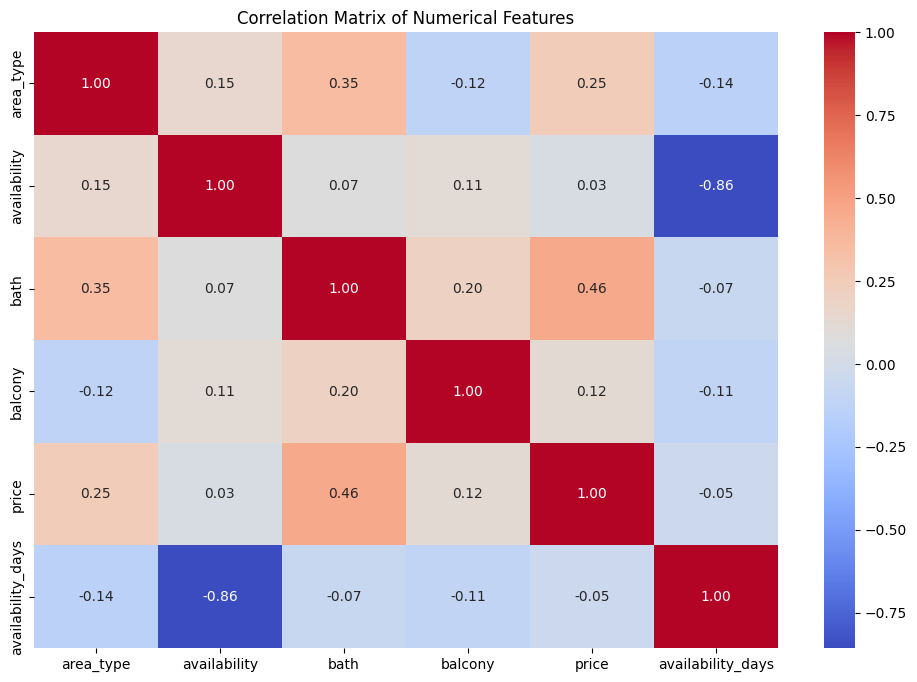

In [25]:
# Calculate the correlation matrix, considering only numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Figure size 1000x800 with 0 Axes>

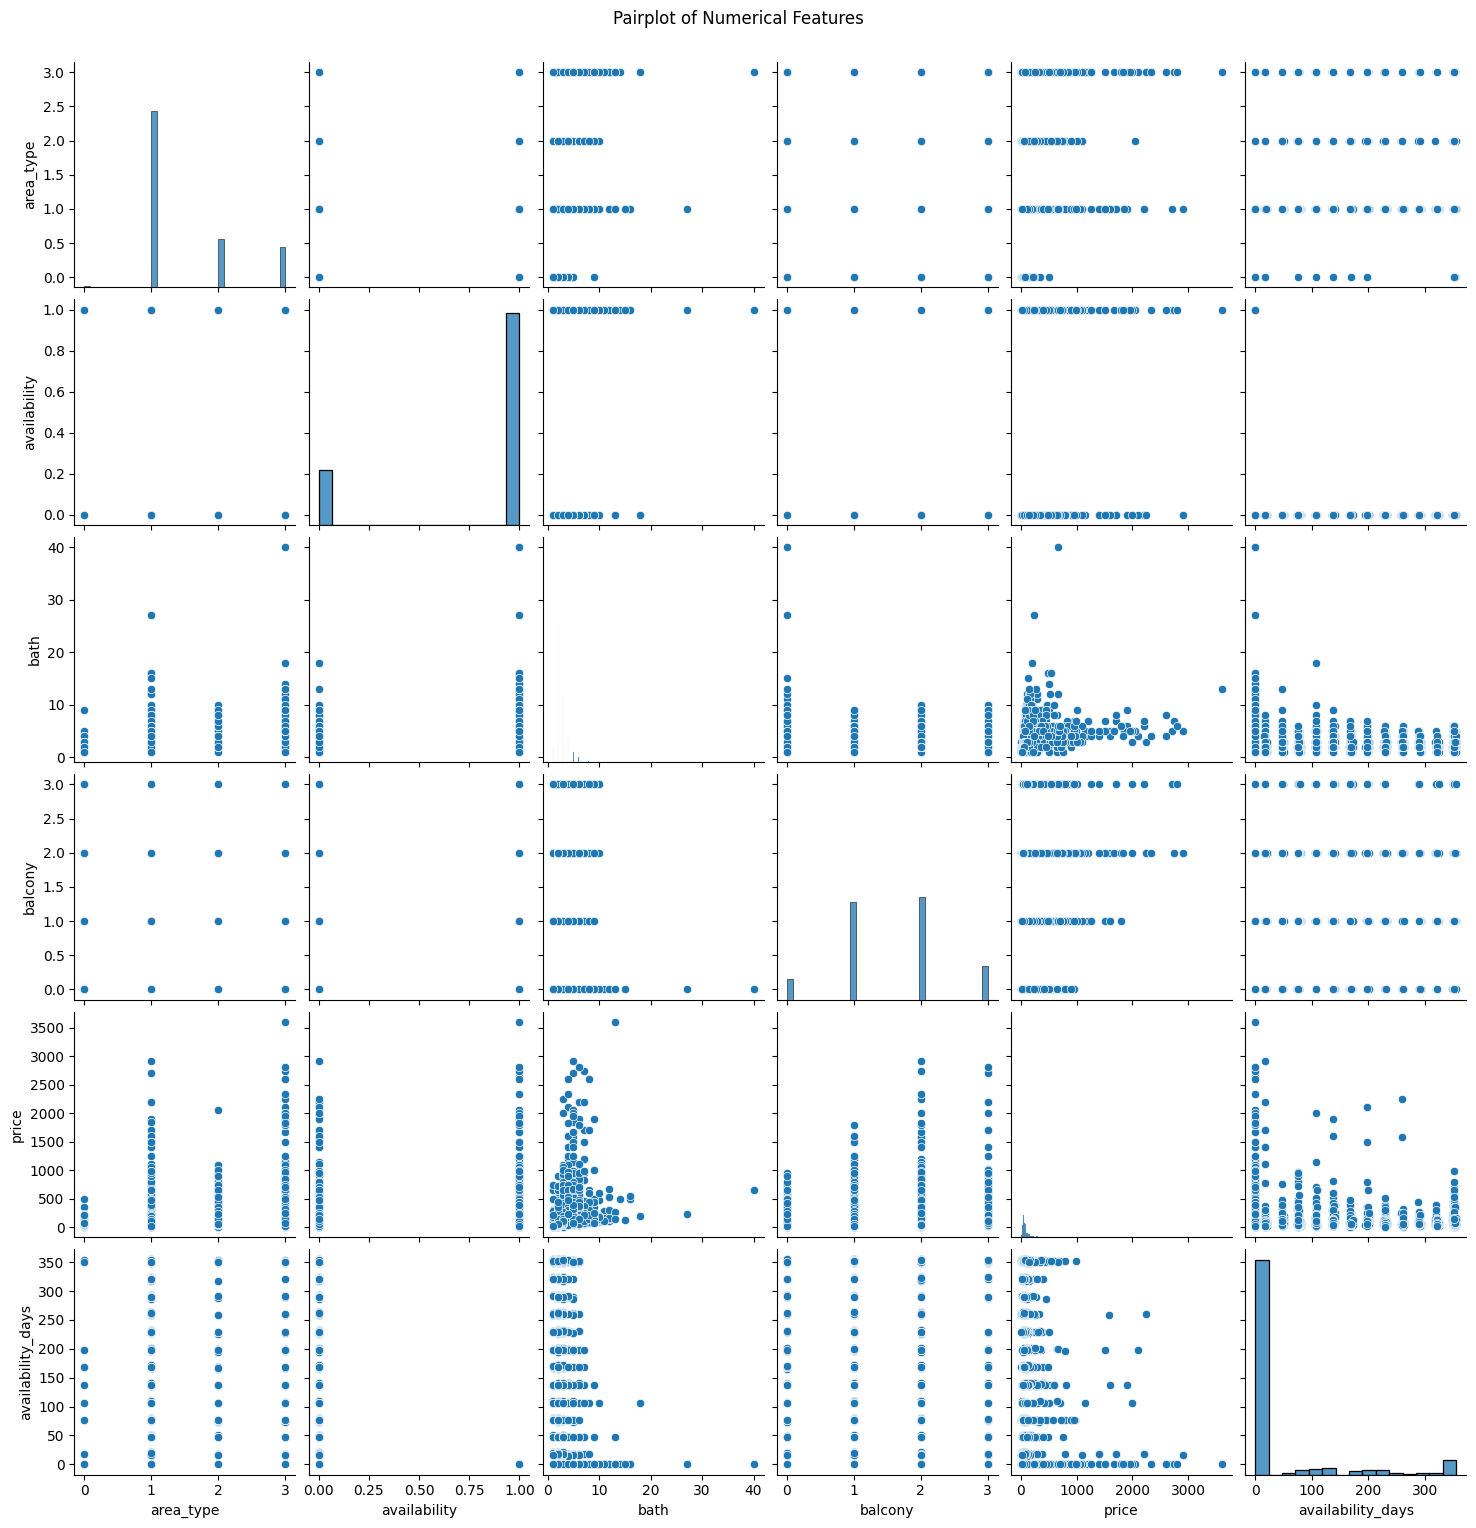

In [26]:
# Assuming you want a pairplot of numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

,0
area_type,0
availability,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0
site_location,0
availability_days,0


In [28]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,area_type,6.387573
1,availability,7.927992
2,bath,8.816279
3,balcony,5.806721
4,availability_days,2.381627


In [30]:
# Check if 'number_of_bedrooms' is in the columns before dropping
if 'number_of_bedrooms' in X.columns:
    X.drop('number_of_bedrooms', axis='columns', inplace=True)
else:
    print("Column 'number_of_bedrooms' not found in DataFrame")


Column 'number_of_bedrooms' not found in DataFrame


In [31]:
# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,area_type,6.387573
1,availability,7.927992
2,bath,8.816279
3,balcony,5.806721
4,availability_days,2.381627


In [32]:
X.drop('bath', axis=1, inplace=True)

In [33]:
# Get the numerical features from the preprocessed dataframe (X)
numerical_features = X.select_dtypes(include=np.number)


# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

vif_data

,feature,VIF
0,area_type,5.632550
1,availability,7.050082
2,balcony,4.918260
3,availability_days,2.015274


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Calculate the mean target value for each category in the training set
site_location_target_encoding = y_train.groupby(X_train['site_location']).mean()

# Map the target encoding to the training and testing sets
X_train['site_location_encoded'] = X_train['site_location'].map(site_location_target_encoding)
X_test['site_location_encoded'] = X_test['site_location'].map(site_location_target_encoding)

# Drop the original 'site_location' column
X_train.drop('site_location', axis=1, inplace=True)
X_test.drop('site_location', axis=1, inplace=True)

In [36]:
X_train.head()

,area_type,availability,size,society,total_sqft,balcony,availability_days,site_location_encoded
9165,1,1,3 BHK,Brtondd,1580,3.0,0,91.527214
3458,1,1,3 BHK,Puestig,1665,2.0,0,93.896077
2317,1,1,2 BHK,Ratlet,1040,1.0,0,85.530000
731,1,1,2 BHK,Srisei,1200,3.0,0,87.122545
8764,1,1,3 BHK,Goandn,1855,3.0,0,118.009500


In [49]:
import statsmodels.formula.api as smf
model = smf.ols("price ~ area_type + availability + total_sqft + bath + balcony + availability_days", data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     24.95
Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:51:29   Log-Likelihood:                -37622.
No. Observations:                7492   AIC:                         7.862e+04
Df Residuals:                    5805   BIC:                         9.029e+04
Df Model:                        1686                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 